<a href="https://colab.research.google.com/github/bhaktichowkwale/DataMiningProject/blob/master/DM_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim

We look forward to answering the following questions using the NYC Parking Ticket data.

EDA: 
1. States of License plate 
2. Timing of tickets 
3. Month wise tickets 
4. Car brand wise
 5. Colorwise 
6. Location wise 
7. Violation code wise 
8. Which precinct has issued more tickets

#Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
!unzip "/content/gdrive/My Drive/Parking_Tickets_2013A.zip"

Archive:  /content/gdrive/My Drive/Parking_Tickets_2013.zip
replace Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv  


In [43]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.1MB 243kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


#Data

In [10]:
data = pd.read_csv("Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,13610,21190,20140831,33.0,33,33,921043,0033,0,0752A,NaN,NaN,F,712,W 175 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,GY,0.0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,40404,40404,20140430,33.0,33,33,921043,0033,0,1240P,NaN,NY,O,201,W 177 ST,NaN,0.0,408.0,C,NaN,BBBBBBB,ALL,ALL,WH,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,31190,13610,20140228,33.0,33,33,921043,0033,0,1243P,NaN,NY,O,520,W 163 ST,NaN,0.0,408.0,F7,NaN,BBBBBBB,ALL,ALL,NaN,0.0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,11710,12010,20141031,33.0,33,33,921043,0033,0,0232P,NaN,NY,O,517,W 176 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,WH,0.0,2010.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,12010,31190,0,33.0,33,33,921043,0033,0,1239P,NaN,NY,F,590,W 174 ST,NaN,0.0,408.0,E1,NaN,BBBBBBB,ALL,ALL,BR,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100273,8006150199,16088MC,NY,COM,06/25/2014,38,VAN,CHEVR,T,67530,26230,84730,88888888,70.0,70,70,350442,T302,K,0346P,NaN,K,F,522,Ocean Ave,NaN,0.0,408.0,h1,NaN,Y,0900A,0700P,WHITE,NaN,2011.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100274,8006150217,94008JW,NY,COM,06/25/2014,38,VAN,CHEVR,T,26230,35680,67530,88888888,70.0,70,70,350442,T302,K,0414P,NaN,K,F,1913,Church Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,WHITE,NaN,2007.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100275,8006150242,FWG3729,NY,PAS,06/25/2014,70,SUBN,FORD,T,40930,40430,48230,20140531,70.0,70,70,350442,T302,K,0448P,NaN,K,F,654,Flatbush Ave,NaN,0.0,408.0,j3,NaN,YYYYYYY,NaN,NaN,WH,NaN,1996.0,NaN,0.0,10 3,70A-Reg. Sticker Expired (NYS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100276,8006150254,193YUR,CT,PAS,06/25/2014,37,SUBN,CHEVR,T,40930,60830,74230,20140088,70.0,70,70,350442,T302,K,0454P,0229P,K,F,606,Flatbush Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,BLACK,NaN,0.0,304-3007,0.0,10 3,37-Expired Muni Meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dataDF = pd.DataFrame(data)
dataDF

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,13610,21190,20140831,33.0,33,33,921043,0033,0,0752A,NaN,NaN,F,712,W 175 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,GY,0.0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,40404,40404,20140430,33.0,33,33,921043,0033,0,1240P,NaN,NY,O,201,W 177 ST,NaN,0.0,408.0,C,NaN,BBBBBBB,ALL,ALL,WH,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,31190,13610,20140228,33.0,33,33,921043,0033,0,1243P,NaN,NY,O,520,W 163 ST,NaN,0.0,408.0,F7,NaN,BBBBBBB,ALL,ALL,NaN,0.0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,11710,12010,20141031,33.0,33,33,921043,0033,0,0232P,NaN,NY,O,517,W 176 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,WH,0.0,2010.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,12010,31190,0,33.0,33,33,921043,0033,0,1239P,NaN,NY,F,590,W 174 ST,NaN,0.0,408.0,E1,NaN,BBBBBBB,ALL,ALL,BR,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100273,8006150199,16088MC,NY,COM,06/25/2014,38,VAN,CHEVR,T,67530,26230,84730,88888888,70.0,70,70,350442,T302,K,0346P,NaN,K,F,522,Ocean Ave,NaN,0.0,408.0,h1,NaN,Y,0900A,0700P,WHITE,NaN,2011.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100274,8006150217,94008JW,NY,COM,06/25/2014,38,VAN,CHEVR,T,26230,35680,67530,88888888,70.0,70,70,350442,T302,K,0414P,NaN,K,F,1913,Church Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,WHITE,NaN,2007.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100275,8006150242,FWG3729,NY,PAS,06/25/2014,70,SUBN,FORD,T,40930,40430,48230,20140531,70.0,70,70,350442,T302,K,0448P,NaN,K,F,654,Flatbush Ave,NaN,0.0,408.0,j3,NaN,YYYYYYY,NaN,NaN,WH,NaN,1996.0,NaN,0.0,10 3,70A-Reg. Sticker Expired (NYS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100276,8006150254,193YUR,CT,PAS,06/25/2014,37,SUBN,CHEVR,T,40930,60830,74230,20140088,70.0,70,70,350442,T302,K,0454P,0229P,K,F,606,Flatbush Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,BLACK,NaN,0.0,304-3007,0.0,10 3,37-Expired Muni Meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#EDA

##State wise registration

In [27]:
stateCount = dataDF['Registration State'].value_counts()[:10]
stateCount

NY    7029804
NJ     878677
PA     225760
CT     136973
FL     111887
MA      78650
VA      60951
MD      50407
IN      49126
NC      47117
Name: Registration State, dtype: int64

Text(0, 0.5, 'Count')

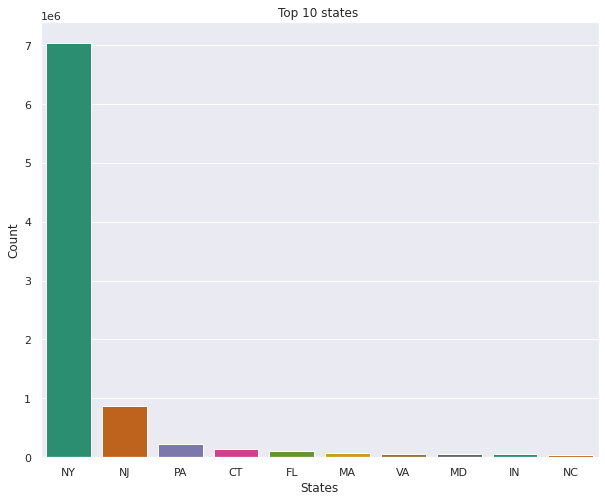

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x = stateCount.index, y = stateCount.values, palette="Dark2")
plt.title('Top 10 states ')
plt.xlabel('States')
plt.ylabel('Count')

##Timing of Tickets

In [54]:
violationTime = dataDF['Violation Time'].value_counts()[:30]
violationTime

0836A    27495
1136A    23682
0806A    23229
0936A    22780
1140A    22323
0906A    22291
0840A    22215
0940A    21360
0838A    20529
0837A    20365
1145A    20148
1139A    19917
1138A    19906
0839A    19850
1137A    19697
0945A    19564
0910A    19499
0845A    19379
1141A    19350
0938A    19342
1142A    19166
0937A    19023
0841A    19003
0939A    18866
1143A    18790
1150A    18670
0907A    18657
0908A    18413
0950A    18368
0941A    18307
Name: Violation Time, dtype: int64

Text(0, 0.5, 'Count')

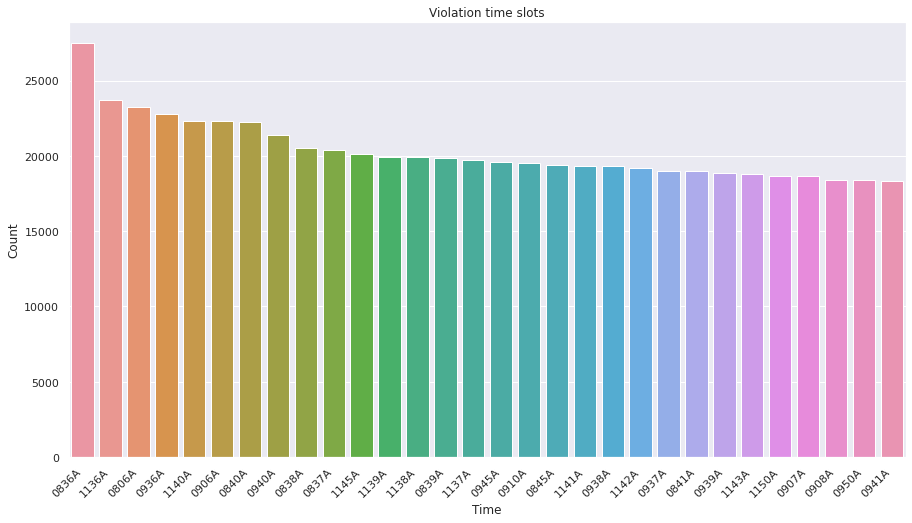

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x = violationTime.index, y = violationTime.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Violation time slots')
plt.xlabel('Time')
plt.ylabel('Count')